In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

In [4]:
#Read the data 
df_8160 = pd.read_csv("ss_monthly_detections.csv")

distinct_count = df_8160["fk_commercial_id"].nunique()

total_rows, total_cols = df_8160.shape

# Print the results
print("Distinct count of commercial ids:", distinct_count)
print("Total number of rows:", total_rows)
display(df_8160.head(10))

Distinct count of commercial ids: 10923
Total number of rows: 54040


,fk_commercial_id,ingestdatetime,mnth,count
0,69030138,2022-10-30 03:10:12.000000,2022-10-01 00:00:00.000000,66319
1,69112649,2022-10-28 02:21:53.000000,2022-10-01 00:00:00.000000,39634
2,69046185,2022-10-31 02:16:46.000000,2023-02-01 00:00:00.000000,9
3,69561786,2022-11-04 04:32:34.000000,2023-02-01 00:00:00.000000,74
4,69749854,2022-11-05 03:53:32.000000,2023-02-01 00:00:00.000000,137
5,70346184,2022-11-19 03:11:47.000000,2023-02-01 00:00:00.000000,22
6,70724923,2022-11-19 02:22:43.000000,2023-02-01 00:00:00.000000,1
7,71498003,2022-12-08 13:59:11.000000,2023-02-01 00:00:00.000000,4
8,71722348,2022-12-09 03:33:21.000000,2023-02-01 00:00:00.000000,68
9,68388962,2022-10-10 02:22:24.000000,2023-01-01 00:00:00.000000,36


In [5]:
df_8160['ingestdatetime'] = pd.to_datetime(df_8160['ingestdatetime'])
df_8160['mnth'] = pd.to_datetime(df_8160['mnth'])
# create new column with truncated start of month
df_8160['ingest_month'] = df_8160['ingestdatetime'].dt.to_period('M').dt.to_timestamp()
df_8160['ingest_month'] = pd.to_datetime(df_8160['ingest_month'])

# calculate difference in months
df_8160['month_diff'] = df_8160.apply(lambda x: relativedelta(x['mnth'], x['ingest_month']).months, axis=1)
df_8160 = df_8160.sort_values(['fk_commercial_id', 'mnth'])
df_8160.head(10)

,fk_commercial_id,ingestdatetime,mnth,count,ingest_month,month_diff
46141,60400135,2023-03-07 21:14:33,2022-10-01,390769,2023-03-01,-5
40510,60400135,2023-03-07 21:14:33,2022-11-01,343362,2023-03-01,-4
36196,60400135,2023-03-07 21:14:33,2022-12-01,388344,2023-03-01,-3
13283,60400135,2023-03-07 21:14:33,2023-01-01,83779,2023-03-01,-2
43343,60400135,2023-03-07 21:14:33,2023-02-01,78473,2023-03-01,-1
53018,60400135,2023-03-07 21:14:33,2023-03-01,25342,2023-03-01,0
8162,60400135,2023-03-07 21:14:33,2023-04-01,6004,2023-03-01,1
39571,64295300,2023-03-07 22:02:24,2022-10-01,396700,2023-03-01,-5
4746,64295300,2023-03-07 22:02:24,2022-11-01,577936,2023-03-01,-4
7750,64295300,2023-03-07 22:02:24,2022-12-01,190006,2023-03-01,-3


In [6]:
# We see there are ids with month difference as -ve 
#Get count of these ids

c = df_8160.loc[df_8160['month_diff'] < 0, 'fk_commercial_id'].nunique()
df_neg = df_8160[df_8160['month_diff'] > 0]['fk_commercial_id'].unique()

print("Distinct count of commercial ids with ingestion date greater than detection:", c)
print(df_neg)
#Filter out these 8 ids 
df_8160 = df_8160[df_8160['month_diff'] >= 0]

Distinct count of commercial ids with ingestion date greater than detection: 8
[60400135 67182495 67230389 ... 76789249 76873985 76926721]


In [7]:

df_8160["running_count"] = df_8160.groupby("fk_commercial_id")["count"].cumsum()

# Calculate the sum of "count" for each group
grouped2 = df_8160.groupby("fk_commercial_id")["count"].sum()

display(grouped2)

# Calculate the percentage count for each group
df_8160["percentage"] = df_8160.apply(lambda row: row["running_count"] / grouped2[row["fk_commercial_id"]], axis=1)

display(df_8160.head(10))

fk_commercial_id
60400135      31346
64295300        394
64891503       6590
67182495    1058841
67230389    4491275
             ...   
76630017        395
76648449     148995
76789249     992419
76873985        718
76926721         98
Name: count, Length: 10919, dtype: int64

,fk_commercial_id,ingestdatetime,mnth,count,ingest_month,month_diff,running_count,percentage
53018,60400135,2023-03-07 21:14:33,2023-03-01,25342,2023-03-01,0,25342,0.808460
8162,60400135,2023-03-07 21:14:33,2023-04-01,6004,2023-03-01,1,31346,1.000000
7055,64295300,2023-03-07 22:02:24,2023-03-01,394,2023-03-01,0,394,1.000000
33559,64891503,2023-03-07 21:01:17,2023-03-01,6590,2023-03-01,0,6590,1.000000
35519,67182495,2022-10-01 02:10:00,2022-10-01,950702,2022-10-01,0,950702,0.897870
17976,67182495,2022-10-01 02:10:00,2022-11-01,5975,2022-10-01,1,956677,0.903513
12191,67182495,2022-10-01 02:10:00,2022-12-01,6935,2022-10-01,2,963612,0.910063
46320,67182495,2022-10-01 02:10:00,2023-01-01,7509,2022-10-01,3,971121,0.917155
39967,67182495,2022-10-01 02:10:00,2023-02-01,19175,2022-10-01,4,990296,0.935264
18954,67182495,2022-10-01 02:10:00,2023-03-01,42834,2022-10-01,5,1033130,0.975718


In [8]:
#Filter for a paritcular id and plot the lifespan of detection for that praticular commercial
filtered_df = df_8160.loc[df_8160['fk_commercial_id'] == 76789249]
filtered_df

,fk_commercial_id,ingestdatetime,mnth,count,ingest_month,month_diff,running_count,percentage
917,76789249,2022-12-31 19:24:18,2022-12-01,11345,2022-12-01,0,11345,0.011432
31508,76789249,2022-12-31 19:24:18,2023-01-01,314324,2022-12-01,1,325669,0.328157
41071,76789249,2022-12-31 19:24:18,2023-02-01,217357,2022-12-01,2,543026,0.547174
47506,76789249,2022-12-31 19:24:18,2023-03-01,261070,2022-12-01,3,804096,0.810238
275,76789249,2022-12-31 19:24:18,2023-04-01,188323,2022-12-01,4,992419,1.000000


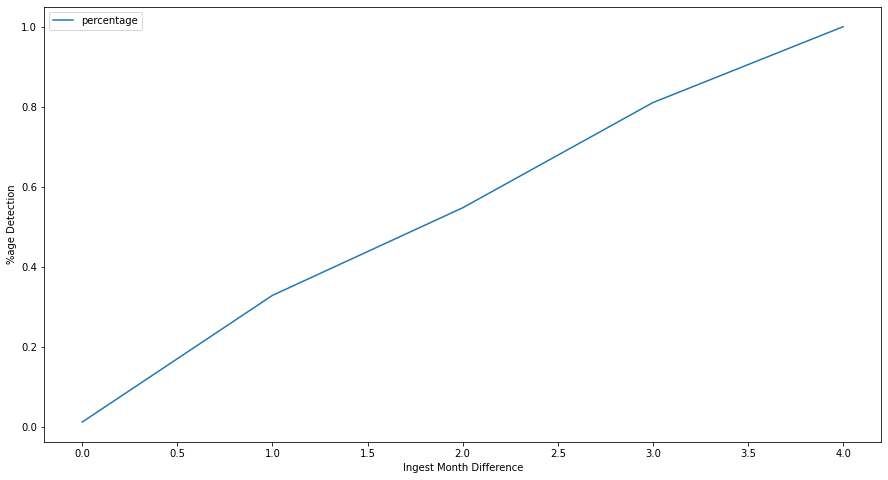

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))

filtered_df.plot(x='month_diff', y='percentage', ax= ax)

# set the x-axis limits to range from 1 to 365
#ax.set_xlim(-12, 12)

ax.set_xlabel('Ingest Month Difference')

ax.set_ylabel('%age Detection')

# show the plot
plt.show()

In [10]:
#Repeat the acitivity with all IDS and get the mean, median, 95th percentile of detection for a day 
#(difference between the ingestion time and detection time )
grouped = df_8160.groupby('month_diff')['percentage']


result = grouped.agg(['median', 'mean',  
                      lambda x: x.quantile(0.05), 
                      lambda x: x.quantile(0.15)])

# reset the index to turn the days difference back into a column
result = result.reset_index()

# rename the columns for clarity
result.columns = ['month_difference', 'median', 'mean', '95th_percentile', '85th_percentile']
result.head(10)

,month_difference,median,mean,95th_percentile,85th_percentile
0,0,0.318841,0.436534,0.012499,0.078906
1,1,0.683047,0.657640,0.163558,0.317060
2,2,0.824098,0.759445,0.308976,0.501199
3,3,0.945575,0.888863,0.603724,0.776985
4,4,1.000000,0.980461,0.862002,0.990725
5,5,1.000000,0.988504,0.914929,0.995647
6,6,1.000000,1.000000,1.000000,1.000000


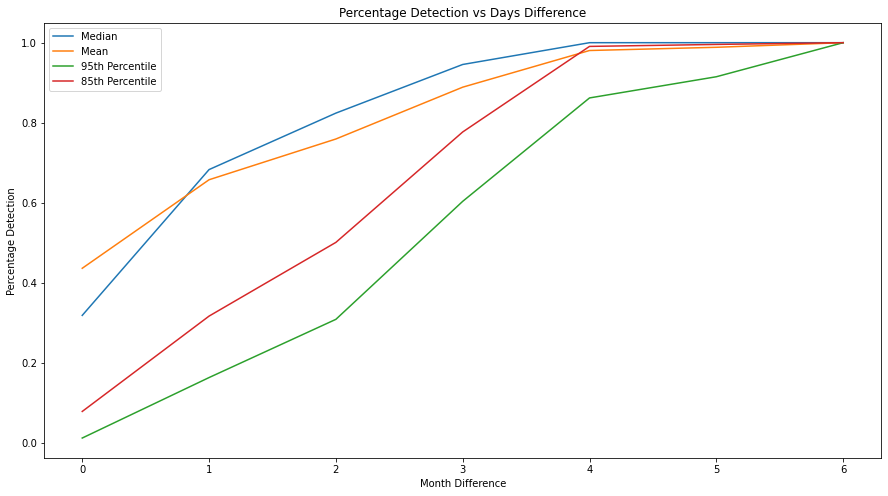

In [11]:
fig = plt.figure(figsize=(15, 8))

# plot the data
plt.plot(result['month_difference'], result['median'], label='Median')
plt.plot(result['month_difference'], result['mean'], label='Mean')
plt.plot(result['month_difference'], result['95th_percentile'], label='95th Percentile')
plt.plot(result['month_difference'], result['85th_percentile'], label='85th Percentile')

# set the x-axis label
plt.xlabel('Month Difference')

# set the y-axis label
plt.ylabel('Percentage Detection')

# set the title
plt.title('Percentage Detection vs Days Difference')

# add legend
plt.legend()

# show the plot
plt.show()

In [12]:
#Get the month by which 95% of detections are done 


In [13]:
grouped2 = grouped2.reset_index().rename(columns={'count': 'total_detections'})
grouped2

,fk_commercial_id,total_detections
0,60400135,31346
1,64295300,394
2,64891503,6590
3,67182495,1058841
4,67230389,4491275
...,...,...
10914,76630017,395
10915,76648449,148995
10916,76789249,992419
10917,76873985,718


In [14]:
result = pd.merge(df_8160, grouped2, on='fk_commercial_id', how='inner')
result

,fk_commercial_id,ingestdatetime,mnth,count,ingest_month,month_diff,running_count,percentage,total_detections
0,60400135,2023-03-07 21:14:33,2023-03-01,25342,2023-03-01,0,25342,0.808460,31346
1,60400135,2023-03-07 21:14:33,2023-04-01,6004,2023-03-01,1,31346,1.000000,31346
2,64295300,2023-03-07 22:02:24,2023-03-01,394,2023-03-01,0,394,1.000000,394
3,64891503,2023-03-07 21:01:17,2023-03-01,6590,2023-03-01,0,6590,1.000000,6590
4,67182495,2022-10-01 02:10:00,2022-10-01,950702,2022-10-01,0,950702,0.897870,1058841
...,...,...,...,...,...,...,...,...,...
54010,76873985,2023-01-03 05:54:26,2023-03-01,202,2023-01-01,2,574,0.799443,718
54011,76873985,2023-01-03 05:54:26,2023-04-01,144,2023-01-01,3,718,1.000000,718
54012,76926721,2023-01-05 03:21:11,2023-02-01,48,2023-01-01,1,48,0.489796,98
54013,76926721,2023-01-05 03:21:11,2023-03-01,25,2023-01-01,2,73,0.744898,98


In [16]:
#display(result[result['percentage'] >= 0.95].head(20)
grouped_df = result[result['percentage'] >= 0.95].groupby('fk_commercial_id')['month_diff'].min().reset_index()
final_df = pd.merge(grouped_df, result[['fk_commercial_id', 'month_diff','percentage', 'total_detections']], on=['fk_commercial_id', 'month_diff'], how='inner')
final_df= final_df.sort_values('total_detections', ascending=False)
final_df.head()

,fk_commercial_id,month_diff,percentage,total_detections
8517,72058315,4,1.0,76512316
8455,72041812,4,1.0,76301149
9530,72320038,4,1.0,72781771
76,67591390,6,1.0,63574042
10200,72523601,3,1.0,62416688


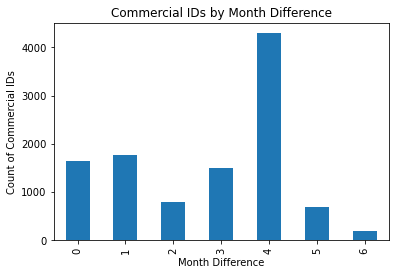

In [245]:
#For all the commercials irrespective of the popularity

counts = final_df.groupby('month_diff')['fk_commercial_id'].nunique()

# create bar plot
fig, ax = plt.subplots()
counts.plot(kind='bar', ax=ax)

# set labels and title
ax.set_xlabel('Month Difference')
ax.set_ylabel('Count of Commercial IDs')
ax.set_title('Commercial IDs by Month Difference')

plt.show()

,month_diff,weights
0,0,0.110056
1,1,0.209878
2,2,0.129859
3,3,0.129872
4,4,0.275441
5,5,0.076512
6,6,0.068383


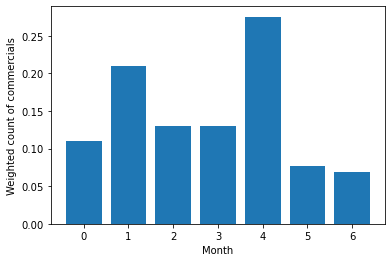

In [248]:
#Add some weight to the data 
total_detections = final_df['total_detections'].sum()

# Calculate percentage weights for each fk_commercial_id
final_df['weights'] = final_df['total_detections']/ total_detections

final_df
# Group by month and sum weights
grouped = final_df.groupby('month_diff')['weights'].sum().reset_index()
display(grouped)

# Plot bar chart of counts weighted by total detections
plt.bar(grouped['month_diff'], grouped['weights'])
plt.xlabel('Month')
plt.ylabel('Weighted count of commercials')
plt.show()